In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [246]:
df=pd.read_csv("../examples/test-output/phase2-full.dat",skiprows=2)

df.columns=df.columns.str.strip()

In [247]:
df.tail()

,Time,Density,gasTemp,av,point,H,#H,H+,@H,H2,...,HS2,HS2+,HSO2+,H2S2+,H2S2,#H2S2,@H2S2,BULK,SURFACE,E-
74,71100.0,100000.0,102.86,11.644,1,0.000007,1.000000e-30,2.198910e-12,1.000000e-30,0.499858,...,6.710960e-10,2.151900e-13,1.131710e-13,7.102470e-14,1.959060e-11,1.210830e-28,4.203090e-18,2.720820e-08,0.000057,6.243620e-07
75,72100.0,100000.0,103.96,11.644,1,0.000007,1.000000e-30,2.025090e-12,1.000000e-30,0.499858,...,7.016420e-10,1.694830e-13,9.873730e-14,5.492890e-14,1.956990e-11,1.000000e-30,1.000000e-30,1.000000e-30,0.000046,6.522390e-07
76,73100.0,100000.0,105.05,11.644,1,0.000007,1.000000e-30,1.859230e-12,1.000000e-30,0.499858,...,7.265610e-10,1.414200e-13,8.604440e-14,4.497490e-14,1.954950e-11,1.000000e-30,1.000000e-30,2.063710e-07,0.000035,6.770120e-07
77,74100.0,100000.0,106.14,11.644,1,0.000007,1.000000e-30,1.729370e-12,1.000000e-30,0.499858,...,7.481020e-10,1.265030e-13,7.699570e-14,3.931200e-14,1.952930e-11,1.000000e-30,1.000000e-30,1.000000e-30,0.000025,6.986500e-07
78,75100.0,100000.0,107.23,11.644,1,0.000007,1.000000e-30,1.654250e-12,1.000000e-30,0.499858,...,7.678150e-10,1.193040e-13,7.241220e-14,3.611370e-14,1.950940e-11,1.000000e-30,1.000000e-30,1.608560e-08,0.000018,7.179780e-07


In [248]:
def ice_total(species):
    return df[f"#{species}"].values+df[f"@{species}"].values

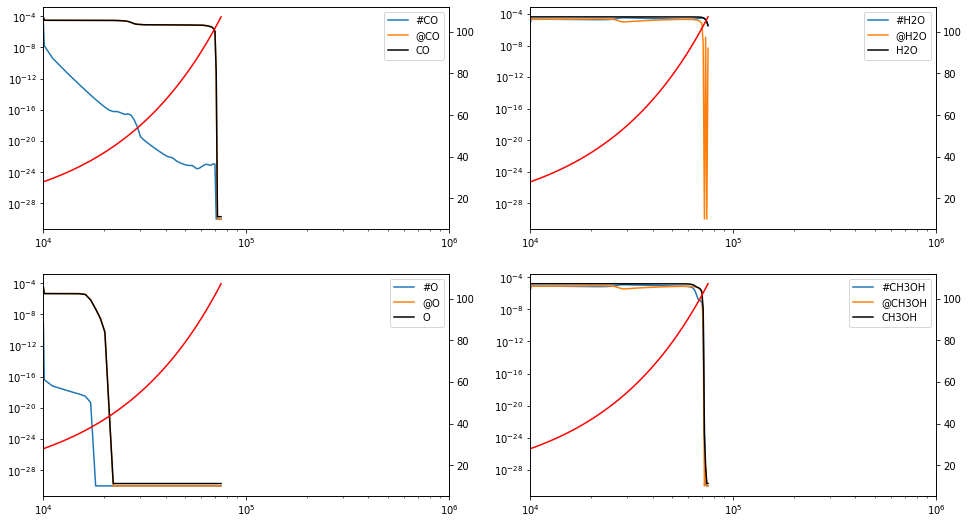

In [249]:
fgi,axes=plt.subplots(2,2,figsize=(16,9))
species=["CO","H2O","O","CH3OH"]
for i,ax in enumerate(axes.flatten()):
    spec=species[i]
    try:
        df[f"#{spec}"]=df[f"#{spec}"].str.replace("+","E+").str.replace("EE","E").astype(float)
    except:
        pass
    try:
        df[f"@{spec}"]=df[f"@{spec}"].str.replace("+","E+").str.replace("EE","E").astype(float)
    except:
        pass
    ax.plot(df["Time"],df[f"#{spec}"],label=f"#{spec}")
    ax.plot(df["Time"],df[f"@{spec}"],label=f"@{spec}")
    ax.plot(df["Time"],ice_total(spec),label=f"{spec}",color="black")
    ax.plot()
    ax.set(yscale="log",xscale="log",xlim=(1e4,1e6))
    ax2=ax.twinx()
    ax2.plot(df["Time"],df["gasTemp"],color="red")
    ax.legend()

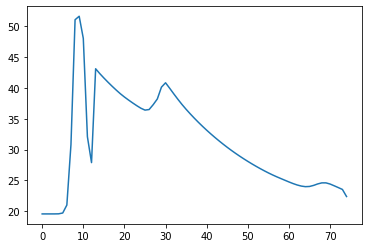

In [213]:
sites_per_grain=1884955.6446075444
gas_to_dust=756764614951.04846

surface_per_grain=df["SURFACE"]*gas_to_dust
surface_layers=surface_per_grain/sites_per_grain

plt.plot(surface_layers)

In [428]:
h2o_be=5600.0
temps=np.arange(0,500,10)
hop=np.exp(-h2o_be/temps)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


[None, (1e-30, 1)]

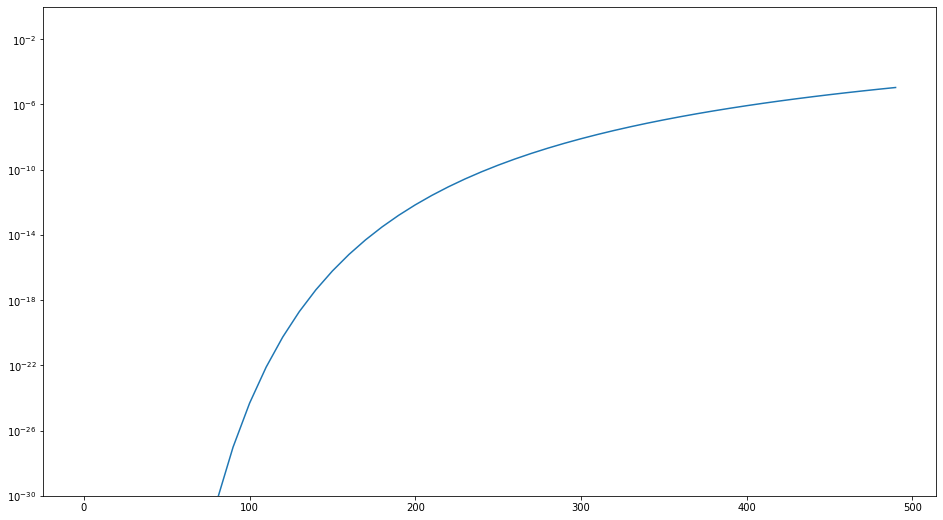

In [422]:
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(temps,hop)
ax.set(yscale="log",ylim=(1e-30,1))
